## Masking

One of the most used concept in Computer Vision. 
Refer last Jupyter Notebook for ending Intuition.

We use a concept called Bitwise And Operation!

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

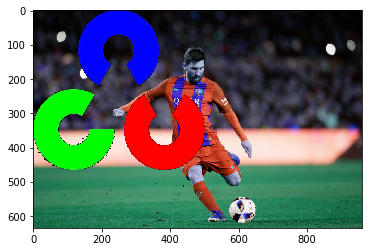

In [2]:
# Load two images
img1 = cv2.imread('messi.jpg')
img2 = cv2.imread('opencv.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)
plt.show()

## Colourspaces

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

For BGR to Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR to HSV, we use the flag cv2.COLOR_BGR2HSV

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print flags

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652R

# Intuition

How can we track an object?

Lets first try to get some bounds on a particular HSV value. This is called Image Thresholding. 

Read more about it - http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

In [4]:
"""
We first create a numpy array which is equivalent to the green colour
"""
green = np.uint8([[[0,255,0 ]]])

hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

print hsv_green

[[[ 60 255 255]]]


Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.

## Exercise

Try to create an object tracker for red colour in live video feed!

In [1]:
#Code goes here!





## Geometric Transformations!

Yes, you can tweak the images to conform to various geometric transformations.

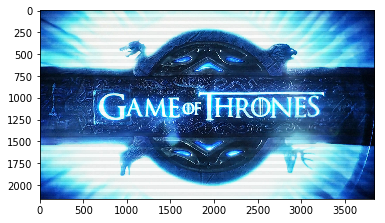

In [3]:
"""
Start with Zooming the picture!
"""

img=cv2.imread("colour2.jpg")

h, w = img.shape[:2] # h and w store the number of rows and columns in img

res = cv2.resize(img, (2*w, 2*h), interpolation = cv2.INTER_CUBIC)


plt.imshow(res)
plt.show()

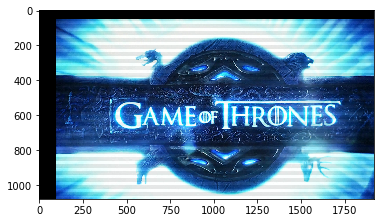

In [19]:
"""
Let's now shift the image position - Translation!!
"""

rows1,cols1,channel = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols1,rows1))

plt.imshow(dst)
plt.show()

#Try to print the dst matrix in order to understand the shift of origin

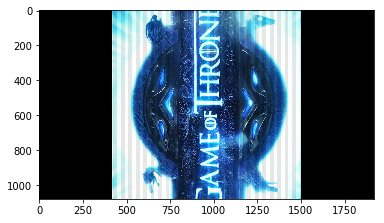

In [20]:
"""
Lets now Rotate the images!
"""

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()